In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import sys, os, inspect
# Load python source folder
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
srcdir = os.path.join(parentdir, "src")
if srcdir not in sys.path: sys.path.insert(0, srcdir)
print(sys.path)
from matplotlib import pyplot as plt
import seaborn as sns

sns.set(font_scale=2, rc={'text.usetex' : True})
sns.set_style("ticks")

['/home/lex/Work/bse/nbody/DynBinEv/src', '/home/lex/Work/bse/nbody/DynBinEv/eqs', '/home/lex/Work/bse/nbody/DynBinEv/eqs', '/home/lex/PythonScripts', '/usr/lib64/python39.zip', '/usr/lib64/python3.9', '/usr/lib64/python3.9/lib-dynload', '', '/home/lex/.local/lib/python3.9/site-packages', '/home/lex/.local/lib/python3.9/site-packages/ParsecTK-0.0.3-py3.9.egg', '/usr/lib64/python3.9/site-packages', '/usr/lib/python3.9/site-packages', '/usr/lib/python3.9/site-packages/IPython/extensions', '/home/lex/.ipython']


In [18]:
from macega_phasevol import MacegaPhaseEvolve
from macega_nbody import MacegaKick
from amuse.units import units, constants
import numpy as np
from timeit import default_timer as timer

m1, m2 = 35 | units.MSun, 82 | units.MSun
a0 = 4000 | units.RSun
a1 = 40 | units.RSun
e0 = 0.2
ome0 = np.pi/2
nu0 = 3*np.pi/2
mu = (m1 + m2)*constants.G
X = 0.05

In [19]:
C_l2k0, Lex, Tex = MacegaPhaseEvolve.C_from_X(X, mu, a0, l=2, k=0)
print("C:", C_l2k0.as_string_in(units.yr**Tex *units.RSun**Lex))

#### SECULAR l=2, k=0
CEvolve = MacegaPhaseEvolve(l=2, k=0)
CEvolve.initialize_system(m1, m2, a0, e0, ome0, nu0, C=C_l2k0, a1=a1)
start = timer()
t, a, e, ome, nu, g = CEvolve.run_system(tfin=CEvolve.Period0*20, dt_out=CEvolve.Period0*0.0001)
end = timer()
print(phtime:=end - start)

C: 3.9788735772973834e-06 yr**0 * RSun**-1.0
Mass units: 2.54495602902e-09 MSun
C units: length**-1 * time**0
C = 3.9788735773e-06 1.43781452193e-09 * m**-1
Period0 = 7.413393724101269 yr
Eps_ce/Eps0 99.0
B0: 2.36420719914e+18
a/adot = -0.225514 Periods
Reached final semimajor axis, halting integration
65.94793962699987


In [20]:
#### NBODY l=2, k=0
CEKickEvolve = MacegaKick(l=2, k=0, dtkick=0.01)
CEKickEvolve.initialize_model(m1, m2, a0, e0, ome0, nu0, afin=a1, C=C_l2k0)
start = timer()
t_nb, a_nb, e_nb, ome_nb, nu_nb = CEKickEvolve.run_model(tfin = CEKickEvolve.Period0*20, dt_out = CEKickEvolve.Period0*0.001, check_collisions=False)
end = timer()
print(nbtime:=end - start)

Mass units: 2.54495602902e-09 MSun
C units: length**-1 * time**0
Period = 7.4133937241 yr
Period = 7.4133937241 yr
Steps per period: = 0.01
Eps_ce/Eps0 99.0
C: 3.9788735772973834e-06 1.4378145219266715e-09 * m**-1
333.205867428001569 a= 40.0006792371 e= 0.0172202502877 m= [35.0, 82.0] MSune= 0.122240314083 m= [35.0, 82.0] MSune= 0.0733173078441 m= [35.0, 82.0] MSun 0.0755157212904 m= [35.0, 82.0] MSunm= [35.0, 82.0] MSun0.0669544817298 m= [35.0, 82.0] MSunm= [35.0, 82.0] MSun e= 0.0649386578336 m= [35.0, 82.0] MSun a= 460.148154052 e= 0.0606563018924 m= [35.0, 82.0] MSun e= 0.0580389220765 m= [35.0, 82.0] MSun0.0594294759083 m= [35.0, 82.0] MSuna= 438.937697708 e= 0.0574347245607 m= [35.0, 82.0] MSun416.580824975 e= 0.0548635194221 m= [35.0, 82.0] MSun [35.0, 82.0] MSune= 0.0494920519964 m= [35.0, 82.0] MSun0.042768723768 m= [35.0, 82.0] MSun0.0426869704142 m= [35.0, 82.0] MSun [35.0, 82.0] MSun a= 199.947927146 e= 0.0377437646176 m= [35.0, 82.0] MSun 198.115928143 e= 0.0372336022321 m

In [21]:
print(nbtime/phtime)

5.052559174897756


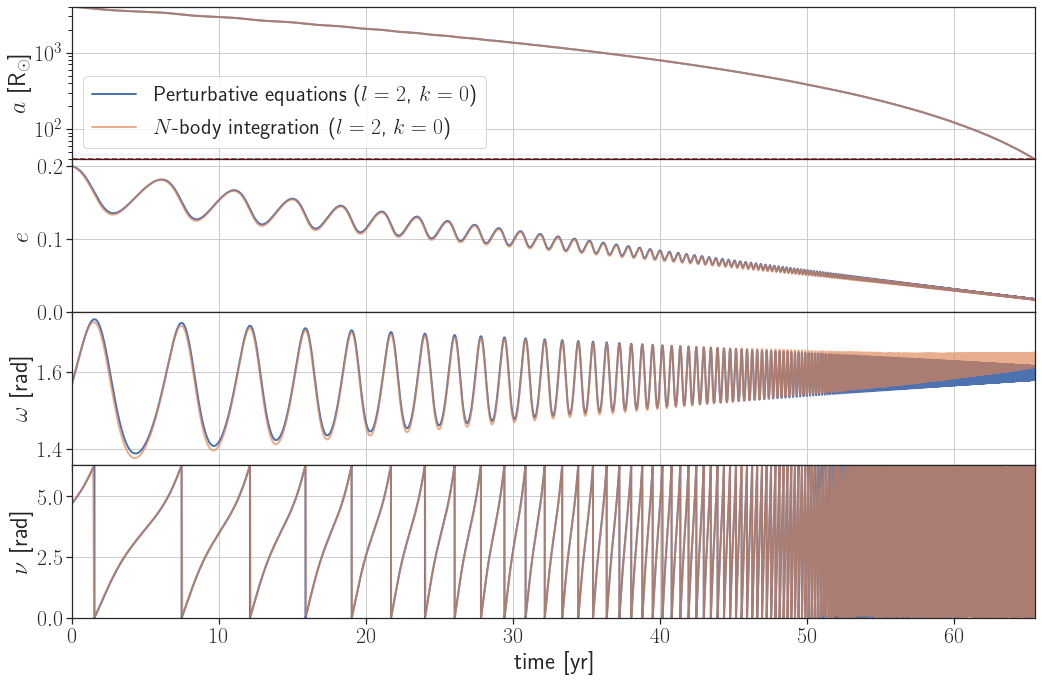

In [22]:
f, ax = plt.subplots(4, sharex=True, figsize=(15, 10))

ax[0].plot(t, a, lw=2, label="Perturbative equations ($l=2$, $k=0$)")
ax[0].plot(t_nb, a_nb, lw=2, alpha=0.66, label="$N$-body integration ($l=2$, $k=0$)")

ax[0].set_ylabel("$a$ [R$_\odot$]")
ax[0].axhline(a0.value_in(units.RSun), c="black", ls="--")
ax[0].axhline(a1.value_in(units.RSun), c="red", ls="--")
ax[0].legend()
#ax[0].set_title("e0 = {:g}".format(e0))
ax[0].set_yscale("log")

ax[1].plot(t, e, lw=2)
ax[1].plot(t_nb, e_nb, lw=2, alpha=0.66, label="$N$-body integration ($l=2$, $k=0$)")
ax[1].set_ylabel("$e$")
ax[1].set_xlabel("time [yr]")
ax[1].set_ylim(bottom=0)

ax[2].plot(t, ome, lw=2)
ax[2].plot(t_nb, ome_nb, lw=2, alpha=0.66)
ax[2].set_ylabel("$\\omega$ [rad]")
ax[2].set_xlabel("time [yr]")
ax[2].set_ylim()

ax[3].plot(t, nu, lw=2)
ax[3].plot(t_nb, nu_nb, lw=2, alpha=0.66)
ax[3].set_ylabel("$\\nu$ [rad]")
ax[3].set_xlabel("time [yr]")
ax[3].set_ylim(bottom=0, top=2 * np.pi)
plt.tight_layout()

for axx in ax: 
    axx.grid(True)
    axx.margins(0.00, 0.00)

f.subplots_adjust(hspace=0)

plt.show()
f.savefig("nbody_comp1.pdf")

In [24]:
#### SECULAR l=1, k=0
C_l1k0, Lex, Tex = MacegaPhaseEvolve.C_from_X(X, mu, a0, l=1, k=0)
CEvolve = MacegaPhaseEvolve(l=1, k=0)
CEvolve.initialize_system(m1, m2, a0, e0, ome0, nu0, C=C_l1k0, a1=a1)
start = timer()
t, a, e, ome, nu, g = CEvolve.run_system(tfin=CEvolve.Period0*20, dt_out=CEvolve.Period0*0.001)
end = timer()
print(phtime:=end - start)

Mass units: 2.54495602902e-09 MSun
C units: length**0 * time**-1
C = 0.0134890987477 3.16887646218e-08 * s**-1
Period0 = 7.413393724101269 yr
Eps_ce/Eps0 99.0
B0: 2.36420719914e+18
a/adot = -0.216667 Periods
12.771750718000476


In [25]:
#### NBODY l=1, k=0
CEKickEvolve = MacegaKick(l=1, k=0, dtkick=0.01)
CEKickEvolve.initialize_model(m1, m2, a0, e0, ome0, nu0, afin=a1, C=C_l1k0)
start = timer()
t_nb, a_nb, e_nb, ome_nb, nu_nb = CEKickEvolve.run_model(tfin = CEKickEvolve.Period0*20, dt_out = CEKickEvolve.Period0*0.001, check_collisions=False)
end = timer()
print(nbtime:=end - start)

Mass units: 2.54495602902e-09 MSun
C units: length**0 * time**-1
Period = 7.4133937241 yr
Period = 7.4133937241 yr
Steps per period: = 0.01
Eps_ce/Eps0 99.0
C: 5.559366255563833e-12 76.88877752008129 * s**-1
829.209720537999665 a= 72.3900836674 e= 0.169559940953 m= [35.0, 82.0] MSune= 0.169506519316 m= [35.0, 82.0] MSun 0.169649895006 m= [35.0, 82.0] MSun 0.169513539574 m= [35.0, 82.0] MSun0.169561450167 m= [35.0, 82.0] MSun[35.0, 82.0] MSunm= [35.0, 82.0] MSun e= 0.169497429599 m= [35.0, 82.0] MSun 0.169539815971 m= [35.0, 82.0] MSunm= [35.0, 82.0] MSun0.169776675415 m= [35.0, 82.0] MSun e= 0.169433640817 m= [35.0, 82.0] MSun 127.525549583 e= 0.169680765103 m= [35.0, 82.0] MSun [35.0, 82.0] MSun0.169761326521 m= [35.0, 82.0] MSune= 0.16945084315 m= [35.0, 82.0] MSune= 0.169610665507 m= [35.0, 82.0] MSun0.169438120481 m= [35.0, 82.0] MSun 125.621061051 e= 0.169435459111 m= [35.0, 82.0] MSun124.320469986 e= 0.169773665063 m= [35.0, 82.0] MSune= 0.169572832936 m= [35.0, 82.0] MSun0.16975

In [27]:
print(nbtime/phtime)

64.92529793658699


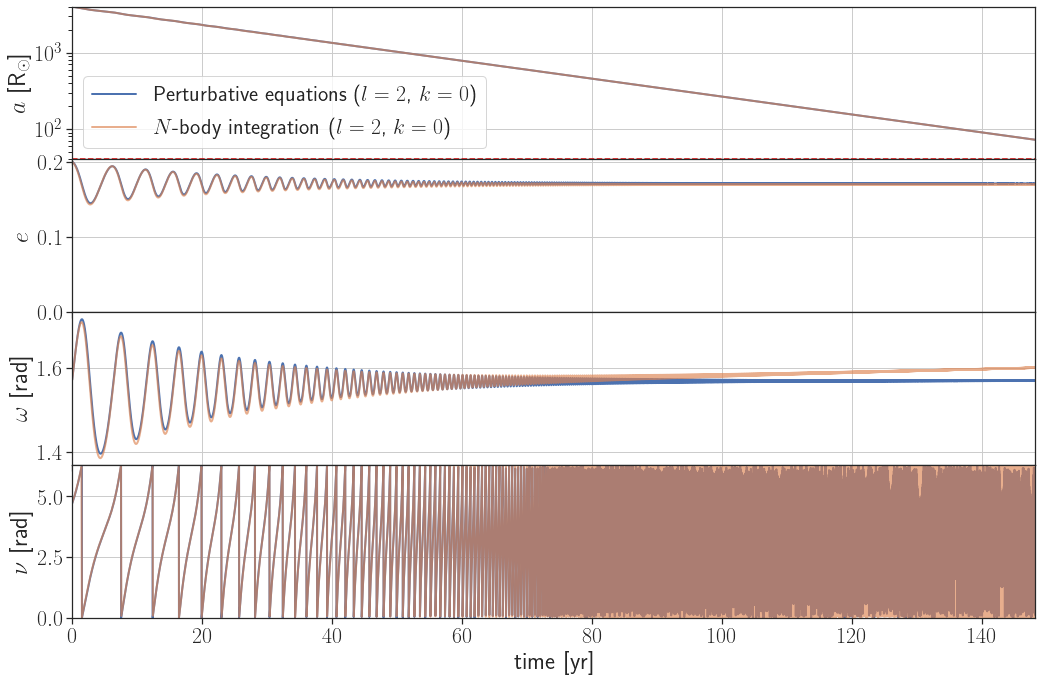

In [26]:
f, ax = plt.subplots(4, sharex=True, figsize=(15, 10))

ax[0].plot(t, a, lw=2, label="Perturbative equations ($l=2$, $k=0$)")
ax[0].plot(t_nb, a_nb, lw=2, alpha=0.66, label="$N$-body integration ($l=2$, $k=0$)")

ax[0].set_ylabel("$a$ [R$_\odot$]")
ax[0].axhline(a0.value_in(units.RSun), c="black", ls="--")
ax[0].axhline(a1.value_in(units.RSun), c="red", ls="--")
ax[0].legend()
ax[0].set_yscale("log")

ax[1].plot(t, e, lw=2)
ax[1].plot(t_nb, e_nb, lw=2, alpha=0.66, label="$N$-body integration ($l=2$, $k=0$)")
ax[1].set_ylabel("$e$")
ax[1].set_xlabel("time [yr]")
ax[1].set_ylim(bottom=0)

ax[2].plot(t, ome, lw=2)
ax[2].plot(t_nb, ome_nb, lw=2, alpha=0.66)
ax[2].set_ylabel("$\\omega$ [rad]")
ax[2].set_xlabel("time [yr]")
ax[2].set_ylim()

ax[3].plot(t, nu, lw=2)
ax[3].plot(t_nb, nu_nb, lw=2, alpha=0.66)
ax[3].set_ylabel("$\\nu$ [rad]")
ax[3].set_xlabel("time [yr]")
ax[3].set_ylim(bottom=0, top=2 * np.pi)
plt.tight_layout()

for axx in ax: 
    axx.grid(True)
    axx.margins(0.00, 0.00)

f.subplots_adjust(hspace=0)

plt.show()
f.savefig("nbody_comp2.pdf")

Using generic functions
Mass units: 2.54495602902e-09 MSun
C units: length**0 * time**0
C = 0.015915494309189534 in none
Period0 = 7.413393724101269 yr
Eps_ce/Eps0 99.0
B0: 2.36420719914e+18
a/adot = -0.208173 Periods
Reached final semimajor axis, halting integration
Using generic functions
Mass units: 2.54495602902e-09 MSun
C units: length**0 * time**0
C = 0.015915494309189534 in none
Period0 = 7.413393724101269 yr
Eps_ce/Eps0 99.0
B0: 2.36420719914e+18
a/adot = -0.288115 Periods
Reached final semimajor axis, halting integration
Using generic functions
Mass units: 2.54495602902e-09 MSun
C units: length**0 * time**0
C = 0.015915494309189534 in none
Period0 = 7.413393724101269 yr
Eps_ce/Eps0 99.0
B0: 2.36420719914e+18
a/adot = -0.573775 Periods
Reached final semimajor axis, halting integration
Using generic functions
Mass units: 2.54495602902e-09 MSun
C units: length**0 * time**0
C = 0.015915494309189534 in none
Period0 = 7.413393724101269 yr
Eps_ce/Eps0 99.0
B0: 2.36420719914e+18
a/ado

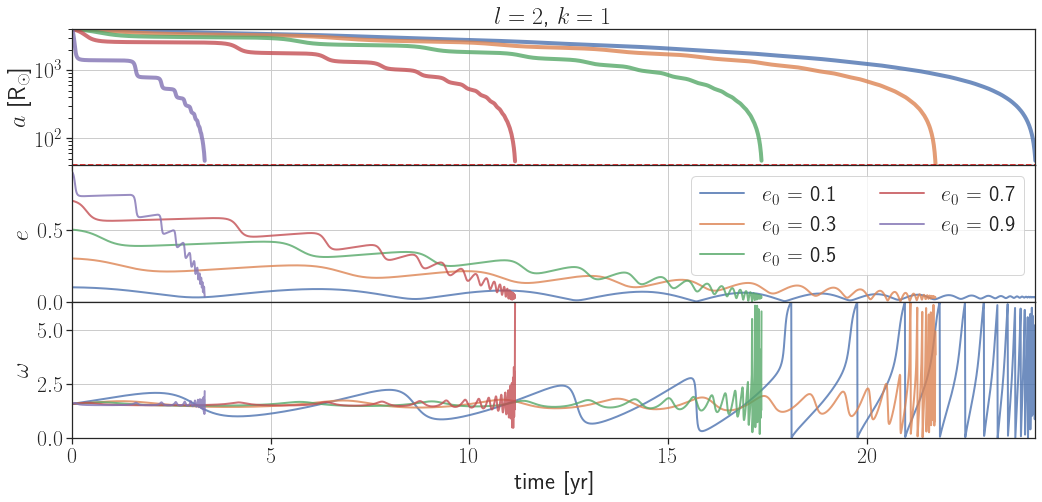

In [48]:
f, ax = plt.subplots(3, sharex=True, figsize=(15, 7.5))

e0list = [0.1, 0.3, 0.5, 0.7, 0.9]

C_l2k1, Lex, Tex = MacegaPhaseEvolve.C_from_X(X, mu, a0, l=2, k=1)

for e0 in e0list:
    CEvolve = MacegaPhaseEvolve(l=2, k=1)
    CEvolve.initialize_system(m1, m2, a0, e0, ome0, nu0, C=C_l2k1, a1=a1)
    t, a, e, ome, nu, g = CEvolve.run_system(tfin=CEvolve.Period0*100, dt_out=CEvolve.Period0*0.001)

    ax[0].plot(t, a, lw=4, alpha=0.8)
    ax[1].plot(t, e, lw=2, alpha=0.8, label="$e_0$ = {:g}".format(e0))
    ax[2].plot(t, ome, lw=2, alpha=0.8)
    #ax[3].plot(t, nu, lw=2, alpha=0.8)
    
ax[0].set_ylabel("$a$ [R$_\odot$]")
ax[0].axhline(a0.value_in(units.RSun), c="black", ls="--")
ax[0].axhline(a1.value_in(units.RSun), c="red", ls="--")
ax[0].set_title("$l = 2$, $k=1$")


ax[0].set_yscale("log")
ax[1].set_ylabel("$e$")
ax[1].set_xlabel("time [yr]")
ax[1].set_ylim(bottom=0)
ax[1].legend(ncol=2)


ax[2].set_ylabel("$\\omega$")
ax[2].set_xlabel("time [yr]")
ax[2].set_ylim(bottom=0, top=2 * np.pi)

#ax[3].set_ylabel("$\\nu$")
#ax[3].set_xlabel("time [yr]")
#ax[3].set_ylim(bottom=0, top=2 * np.pi)

plt.tight_layout()
for axx in ax: 
    axx.grid(True)
    axx.margins(0.00, 0.00)

f.subplots_adjust(hspace=0)

plt.savefig("l2k1_evol.pdf")
plt.show()

Using generic functions
Mass units: 2.54495602902e-09 MSun
C units: length * time**-1
C = 53.9563949908 22.0395357945 * m * s**-1
Period0 = 7.413393724101269 yr
Eps_ce/Eps0 99.0
B0: 2.36420719914e+18
a/adot = -0.206101 Periods
Reached final semimajor axis, halting integration
Using generic functions
Mass units: 2.54495602902e-09 MSun
C units: length * time**-1
C = 53.9563949908 22.0395357945 * m * s**-1
Period0 = 7.413393724101269 yr
Eps_ce/Eps0 99.0
B0: 2.36420719914e+18
a/adot = -0.263253 Periods
Reached final semimajor axis, halting integration
Using generic functions
Mass units: 2.54495602902e-09 MSun
C units: length * time**-1
C = 53.9563949908 22.0395357945 * m * s**-1
Period0 = 7.413393724101269 yr
Eps_ce/Eps0 99.0
B0: 2.36420719914e+18
a/adot = -0.444444 Periods
Reached final semimajor axis, halting integration
Using generic functions
Mass units: 2.54495602902e-09 MSun
C units: length * time**-1
C = 53.9563949908 22.0395357945 * m * s**-1
Period0 = 7.413393724101269 yr
Eps_ce/E

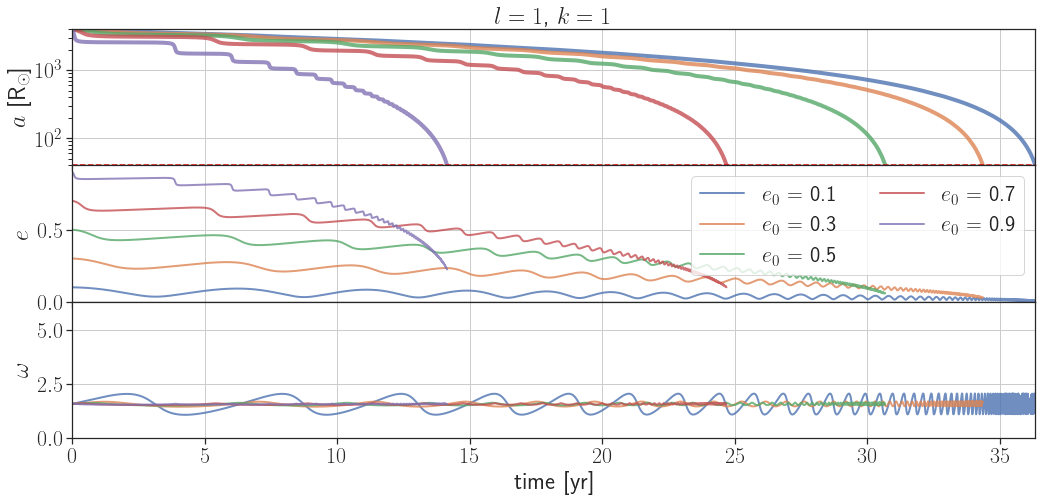

In [49]:
f, ax = plt.subplots(3, sharex=True, figsize=(15, 7.5))

e0list = [0.1, 0.3, 0.5, 0.7, 0.9]

C_l1k1, Lex, Tex = MacegaPhaseEvolve.C_from_X(X, mu, a0, l=1, k=1)

for e0 in e0list:
    CEvolve = MacegaPhaseEvolve(l=1, k=1)
    CEvolve.initialize_system(m1, m2, a0, e0, ome0, nu0, C=C_l1k1, a1=a1)
    t, a, e, ome, nu, g = CEvolve.run_system(tfin=CEvolve.Period0*100, dt_out=CEvolve.Period0*0.001)

    ax[0].plot(t, a, lw=4, alpha=0.8)
    ax[1].plot(t, e, lw=2, alpha=0.8, label="$e_0$ = {:g}".format(e0))
    ax[2].plot(t, ome, lw=2, alpha=0.8)
    #ax[3].plot(t, nu, lw=2, alpha=0.8)
    
ax[0].set_ylabel("$a$ [R$_\odot$]")
ax[0].axhline(a0.value_in(units.RSun), c="black", ls="--")
ax[0].axhline(a1.value_in(units.RSun), c="red", ls="--")
ax[0].set_title("$l = 1$, $k=1$")


ax[0].set_yscale("log")
ax[1].set_ylabel("$e$")
ax[1].set_xlabel("time [yr]")
ax[1].set_ylim(bottom=0)
ax[1].legend(ncol=2)


ax[2].set_ylabel("$\\omega$")
ax[2].set_xlabel("time [yr]")
ax[2].set_ylim(bottom=0, top=2 * np.pi)

#ax[3].set_ylabel("$\\nu$")
#ax[3].set_xlabel("time [yr]")
#ax[3].set_ylim(bottom=0, top=2 * np.pi)

plt.tight_layout()
for axx in ax: 
    axx.grid(True)
    axx.margins(0.00, 0.00)

f.subplots_adjust(hspace=0)

plt.savefig("l1k1_evol.pdf")
plt.show()

Using generic functions
Mass units: 2.54495602902e-09 MSun
C units: length**2 * time**-1
C = 215825.579963 15328497145.1 * m**2 * s**-1
Period0 = 7.413393724101269 yr
Eps_ce/Eps0 99.0
B0: 2.36420719914e+18
a/adot = -0.208183 Periods
Reached final semimajor axis, halting integration
Using generic functions
Mass units: 2.54495602902e-09 MSun
C units: length**2 * time**-1
C = 215825.579963 15328497145.1 * m**2 * s**-1
Period0 = 7.413393724101269 yr
Eps_ce/Eps0 99.0
B0: 2.36420719914e+18
a/adot = -0.289289 Periods


/home/lex/Work/bse/nbody/DynBinEv/src/macega_phasevol.py:138: RuntimeWarning: invalid value encountered in double_scalars
  nudot = n * opecosnu * opecosnu / self.ome2 ** 1.5


Reached final semimajor axis, halting integration
Using generic functions
Mass units: 2.54495602902e-09 MSun
C units: length**2 * time**-1
C = 215825.579963 15328497145.1 * m**2 * s**-1
Period0 = 7.413393724101269 yr
Eps_ce/Eps0 99.0
B0: 2.36420719914e+18
a/adot = -0.592593 Periods


/home/lex/Work/bse/nbody/DynBinEv/src/macega_phasevol.py:138: RuntimeWarning: invalid value encountered in double_scalars
  nudot = n * opecosnu * opecosnu / self.ome2 ** 1.5


Reached final semimajor axis, halting integration
Using generic functions
Mass units: 2.54495602902e-09 MSun
C units: length**2 * time**-1
C = 215825.579963 15328497145.1 * m**2 * s**-1
Period0 = 7.413393724101269 yr
Eps_ce/Eps0 99.0
B0: 2.36420719914e+18
a/adot = -2.2465 Periods
Reached final semimajor axis, halting integration
Using generic functions
Mass units: 2.54495602902e-09 MSun
C units: length**2 * time**-1
C = 215825.579963 15328497145.1 * m**2 * s**-1
Period0 = 7.413393724101269 yr
Eps_ce/Eps0 99.0
B0: 2.36420719914e+18
a/adot = -52.7774 Periods
Reached final semimajor axis, halting integration


/home/lex/Work/bse/nbody/DynBinEv/src/macega_phasevol.py:138: RuntimeWarning: invalid value encountered in double_scalars
  nudot = n * opecosnu * opecosnu / self.ome2 ** 1.5


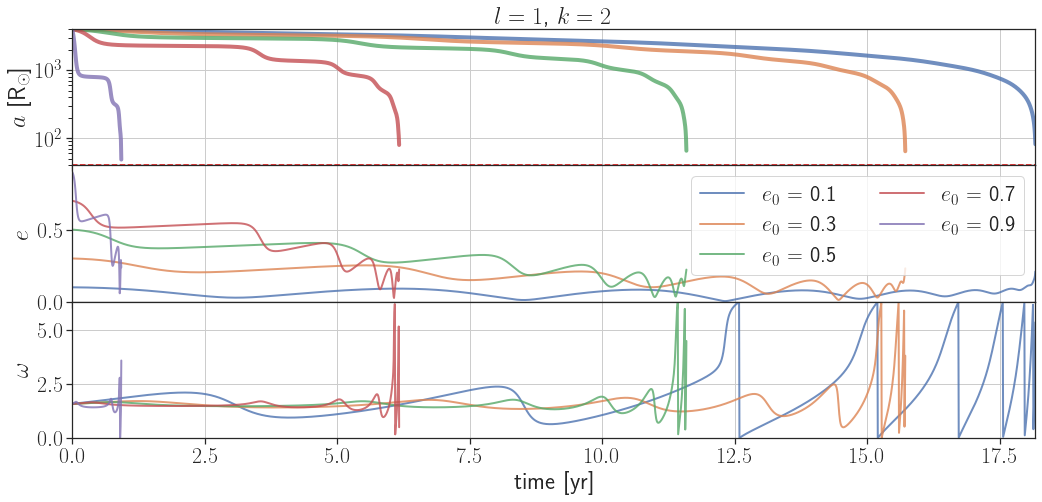

In [8]:
f, ax = plt.subplots(3, sharex=True, figsize=(15, 7.5))

e0list = [0.1, 0.3, 0.5, 0.7, 0.9]
X = 0.05
C_l1k2, Lex, Tex = MacegaPhaseEvolve.C_from_X(X, mu, a0, l=1, k=2)

for e0 in e0list:
    CEvolve = MacegaPhaseEvolve(l=1, k=2)
    CEvolve.initialize_system(m1, m2, a0, e0, ome0, nu0, C=C_l1k2, a1=a1)
    t, a, e, ome, nu, g = CEvolve.run_system(tfin=CEvolve.Period0*100, dt_out=CEvolve.Period0*0.001)

    ax[0].plot(t, a, lw=4, alpha=0.8)
    ax[1].plot(t, e, lw=2, alpha=0.8, label="$e_0$ = {:g}".format(e0))
    ax[2].plot(t, ome, lw=2, alpha=0.8)
    #ax[3].plot(t, nu, lw=2, alpha=0.8)
    
ax[0].set_ylabel("$a$ [R$_\odot$]")
ax[0].axhline(a0.value_in(units.RSun), c="black", ls="--")
ax[0].axhline(a1.value_in(units.RSun), c="red", ls="--")
ax[0].set_title("$l = 1$, $k=2$")


ax[0].set_yscale("log")
ax[1].set_ylabel("$e$")
ax[1].set_xlabel("time [yr]")
ax[1].set_ylim(bottom=0)
ax[1].legend(ncol=2)


ax[2].set_ylabel("$\\omega$")
ax[2].set_xlabel("time [yr]")
ax[2].set_ylim(bottom=0, top=2 * np.pi)

#ax[3].set_ylabel("$\\nu$")
#ax[3].set_xlabel("time [yr]")
#ax[3].set_ylim(bottom=0, top=2 * np.pi)

plt.tight_layout()
for axx in ax: 
    axx.grid(True)
    axx.margins(0.00, 0.00)

f.subplots_adjust(hspace=0)

plt.savefig("l1k2_evol.pdf")
plt.show()

Using generic functions
Mass units: 2.54495602902e-09 MSun
C units: length**2 * time**0
C = 254647.908947 4.8372025e+17 * m**2
Period0 = 7.413393724101269 yr
Eps_ce/Eps0 99.0
B0: 2.36420719914e+18
a/adot = -0.2124 Periods
Using generic functions
Mass units: 2.54495602902e-09 MSun
C units: length**2 * time**0
C = 254647.908947 4.8372025e+17 * m**2
Period0 = 7.413393724101269 yr
Eps_ce/Eps0 99.0
B0: 2.36420719914e+18
a/adot = -0.347923 Periods
Using generic functions
Mass units: 2.54495602902e-09 MSun
C units: length**2 * time**0
C = 254647.908947 4.8372025e+17 * m**2
Period0 = 7.413393724101269 yr
Eps_ce/Eps0 99.0
B0: 2.36420719914e+18
a/adot = -1.02004 Periods
Using generic functions
Mass units: 2.54495602902e-09 MSun
C units: length**2 * time**0
C = 254647.908947 4.8372025e+17 * m**2
Period0 = 7.413393724101269 yr
Eps_ce/Eps0 99.0
B0: 2.36420719914e+18
a/adot = -7.52911 Periods
Using generic functions
Mass units: 2.54495602902e-09 MSun
C units: length**2 * time**0
C = 254647.908947 4.

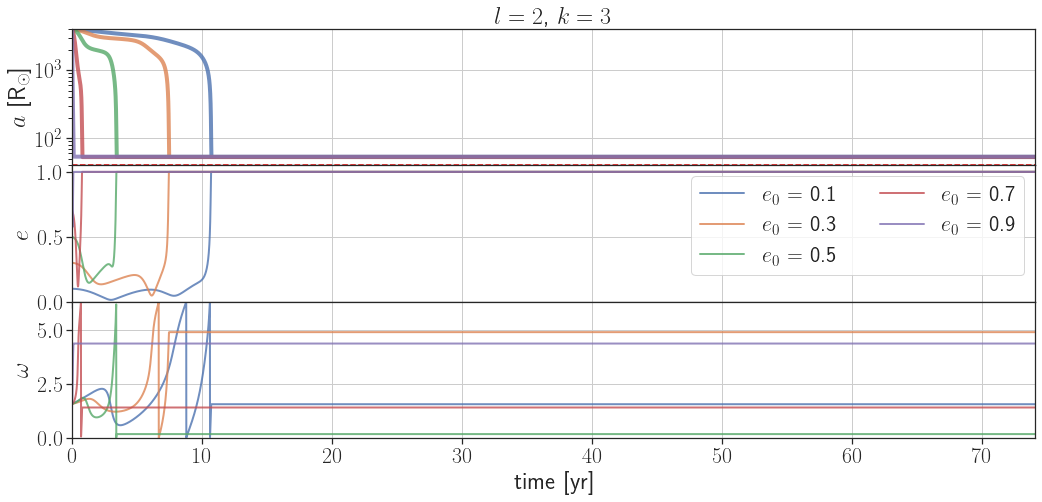

In [17]:
f, ax = plt.subplots(3, sharex=True, figsize=(15, 7.5))

e0list = [0.1, 0.3, 0.5, 0.7, 0.9]
X = 0.05
l,k = 2, 3
C_lm1k0, Lex, Tex = MacegaPhaseEvolve.C_from_X(X, mu, a0, l=l, k=k)

for e0 in e0list:
    CEvolve = MacegaPhaseEvolve(l=l, k=k)
    CEvolve.initialize_system(m1, m2, a0, e0, ome0, nu0, C=C_lm1k0, a1=a1)
    t, a, e, ome, nu, g = CEvolve.run_system(tfin=CEvolve.Period0*10, dt_out=CEvolve.Period0*0.001)

    ax[0].plot(t, a, lw=4, alpha=0.8)
    ax[1].plot(t, e, lw=2, alpha=0.8, label="$e_0$ = {:g}".format(e0))
    ax[2].plot(t, ome, lw=2, alpha=0.8)
    #ax[3].plot(t, nu, lw=2, alpha=0.8)
    
ax[0].set_ylabel("$a$ [R$_\odot$]")
ax[0].axhline(a0.value_in(units.RSun), c="black", ls="--")
ax[0].axhline(a1.value_in(units.RSun), c="red", ls="--")
ax[0].set_title("$l = {:d}$, $k={:d}$".format(l, k))


ax[0].set_yscale("log")
ax[1].set_ylabel("$e$")
ax[1].set_xlabel("time [yr]")
ax[1].set_ylim(bottom=0)
ax[1].legend(ncol=2)


ax[2].set_ylabel("$\\omega$")
ax[2].set_xlabel("time [yr]")
ax[2].set_ylim(bottom=0, top=2 * np.pi)

#ax[3].set_ylabel("$\\nu$")
#ax[3].set_xlabel("time [yr]")
#ax[3].set_ylim(bottom=0, top=2 * np.pi)

plt.tight_layout()
for axx in ax: 
    axx.grid(True)
    axx.margins(0.00, 0.00)

f.subplots_adjust(hspace=0)

plt.savefig("lm1k2_evol.pdf")
plt.show()